# Setup the Demo

In [1]:
import Physics_Filter
import numpy
import matplotlib.pyplot as plt
import pandas
import csv

In [2]:
handParts = ["palmNormXKF", "palmNormYKF","palmNormZKF",
             "palmDirXKF", "palmDirYKF", "palmDirZKF",
             "palmXKF", "palmYKF", "palmZKF", 
             "thumbDev1KF", "thumbDev2KF", "thumbDev3KF", 
             "thumbJoint1KF","thumbJoint2KF",
             "pointerDev1KF", "pointerDev2KF", "pointerDev3KF", 
             "pointerJoint1KF","pointerJoint2KF", "pointerJoin3KF",
             "middleDev1KF", "middleDev2KF", "middleDev3KF",
             "middleJoint1KF", "middleJoint2KF", "middleJoint3KF",
             "ringDev1KF", "ringDev2KF","ringDev3KF",
             "ringJoint1KF", "ringJoint2KF", "ringJoint3KF",
             "pinkyDev1KF", "pinkyDev2KF","pinkyDev3KF",
             "pinkyJoint1KF", "pinkyJoint2KF", "pinkyJoinT3KF"]

In [3]:
def initializeHand():    
    #for part in range(len(handParts)):
    part = 0
    while part < len(handParts):
        handParts[part] = Physics_Filter.Physics_Filter(handParts[part])
        part = part + 1
    # Initializes all the parts of the hand for the filter

In [4]:
def dataSorter(absoluteFilePath):
    # this was brute forced, I'll deal with it later
        
    rawData = pandas.read_csv(absoluteFilePath)
    headers = rawData.columns.tolist()
        
    palmNormalX       = numpy.array(rawData[:][headers[0]].values.tolist())
    palmNormalY       = numpy.array(rawData[:][headers[1]].values.tolist())
    palmNormalZ       = numpy.array(rawData[:][headers[2]].values.tolist())

    palmDirectionX    = numpy.array(rawData[:][headers[3]].values.tolist())
    palmDirectionY    = numpy.array(rawData[:][headers[4]].values.tolist())
    palmDirectionZ    = numpy.array(rawData[:][headers[5]].values.tolist())

    palmCenterX       = numpy.array(rawData[:][headers[6]].values.tolist())
    palmCenterY       = numpy.array(rawData[:][headers[7]].values.tolist())
    palmCenterZ       = numpy.array(rawData[:][headers[8]].values.tolist())

    palmVelocityX     = numpy.array(rawData[:][headers[9]].values.tolist())
    palmVelocityY     = numpy.array(rawData[:][headers[10]].values.tolist())
    palmVelocityZ     = numpy.array(rawData[:][headers[11]].values.tolist())

    thumbDeviation1   = numpy.array(rawData[:][headers[12]].values.tolist())
    thumbDeviation2   = numpy.array(rawData[:][headers[13]].values.tolist())
    thumbDeviation3   = numpy.array(rawData[:][headers[14]].values.tolist())

    thumbJointAngle1  = numpy.array(rawData[:][headers[15]].values.tolist())
    thumbJointAngle2  = numpy.array(rawData[:][headers[16]].values.tolist())

    indexDeviation1   = numpy.array(rawData[:][headers[17]].values.tolist())
    indexDeviation2   = numpy.array(rawData[:][headers[18]].values.tolist())
    indexDeviation3   = numpy.array(rawData[:][headers[19]].values.tolist())

    indexJointAngle1  = numpy.array(rawData[:][headers[20]].values.tolist())
    indexJointAngle2  = numpy.array(rawData[:][headers[21]].values.tolist())
    indexJointAngle3  = numpy.array(rawData[:][headers[22]].values.tolist())

    middleDeviation1  = numpy.array(rawData[:][headers[23]].values.tolist())
    middleDeviation2  = numpy.array(rawData[:][headers[24]].values.tolist())
    middleDeviation3  = numpy.array(rawData[:][headers[25]].values.tolist())

    middleJointAngle1 = numpy.array(rawData[:][headers[26]].values.tolist())
    middleJointAngle2 = numpy.array(rawData[:][headers[27]].values.tolist())
    middleJointAngle3 = numpy.array(rawData[:][headers[28]].values.tolist())
        
    ringDeviation1    = numpy.array(rawData[:][headers[29]].values.tolist())
    ringDeviation2    = numpy.array(rawData[:][headers[30]].values.tolist())
    ringDeviation3    = numpy.array(rawData[:][headers[31]].values.tolist())

    ringJointAngle1   = numpy.array(rawData[:][headers[32]].values.tolist())
    ringJointAngle2   = numpy.array(rawData[:][headers[33]].values.tolist())
    ringJointAngle3   = numpy.array(rawData[:][headers[34]].values.tolist())

    pinkyDeviation1   = numpy.array(rawData[:][headers[35]].values.tolist())
    pinkyDeviation2   = numpy.array(rawData[:][headers[36]].values.tolist())
    pinkyDeviation3   = numpy.array(rawData[:][headers[37]].values.tolist())

    pinkyJointAngle1  = numpy.array(rawData[:][headers[38]].values.tolist())
    pinkyJointAngle2  = numpy.array(rawData[:][headers[39]].values.tolist())
    pinkyJointAngle3  = numpy.array(rawData[:][headers[40]].values.tolist())

    timeStamp         = numpy.array(rawData[:][headers[41]].values.tolist())
                        
    canonicalData = [palmNormalX,       palmNormalY,      palmNormalZ,  
                     palmDirectionX,    palmDirectionY,   palmDirectionZ,
                     palmCenterX,       palmCenterY,      palmCenterZ,
                     palmVelocityX,     palmVelocityY,    palmVelocityZ,
                     thumbDeviation1,   thumbDeviation2,  thumbDeviation3,
                     thumbJointAngle1,  thumbJointAngle2, 
                     indexDeviation1,   indexDeviation2,  indexDeviation3, 
                     indexJointAngle1,  indexJointAngle2, indexJointAngle3,
                     middleDeviation1,  middleDeviation2, middleDeviation3, 
                     middleJointAngle1, middleJointAngle2, middleJointAngle3,
                     ringDeviation1,    ringDeviation2,   ringDeviation3, 
                     ringJointAngle1,   ringJointAngle2, ringJointAngle3,
                     pinkyDeviation1,   pinkyDeviation2,  pinkyDeviation3,   
                     pinkyJointAngle1,  pinkyJointAngle2,  pinkyJointAngle3,
                     timeStamp]

    return canonicalData

In [5]:
def setupKF(staticAbsoluteFilePath, movingAbsoluteFilePath):
        
    staticCanonicalData = dataSorter(staticAbsoluteFilePath)
    movingCanonicalData = dataSorter(movingAbsoluteFilePath)
    
    # setupKalmanFilter for each handPart, not sure how to condense this
    part = 0
    while part < 6:
        handParts[part].setupKalmanFilterx(staticCanonicalData[part], movingCanonicalData[part], staticCanonicalData[41], movingCanonicalData[41])
        part = part + 1
        
    handParts[6].setupKalmanFilterxv(staticCanonicalData[6], staticCanonicalData[9],  movingCanonicalData[6], movingCanonicalData[9])
    handParts[7].setupKalmanFilterxv(staticCanonicalData[7], staticCanonicalData[10],  movingCanonicalData[7], movingCanonicalData[10])
    handParts[8].setupKalmanFilterxv(staticCanonicalData[8], staticCanonicalData[11],  movingCanonicalData[8], movingCanonicalData[11])
    
    part = 9
    while part < len(handParts):
        handParts[part].setupKalmanFilterx(staticCanonicalData[part+3], movingCanonicalData[part+3], staticCanonicalData[41], movingCanonicalData[41])
        part = part + 1
    

In [6]:
def getInitialState(canonicalData, nextData):
    
    part = 0
    while part < len(handParts):
        handParts[part].timestamp = canonicalData[41]
        part = part + 1
    
    part = 0
    while part < len(handParts):
        handParts[part].getDeltaTk(nextData[41])
        handParts[part].priorState = numpy.zeros((2))
        part = part + 1
        
    part = 0
    while part < 6:
        handParts[part].priorState[0] = canonicalData[part]
        handParts[part].priorState[1] = handParts[part].calcVelocityk(nextData[part])
        part = part + 1  
        
    part = 6
    while part < 10:
        handParts[part].priorState[0] = canonicalData[part]
        handParts[part].priorState[1] = canonicalData[part+3]
        part = part + 1
    
    part = 9
    while part < len(handParts):
        handParts[part].priorState[0] = canonicalData[part+3]
        handParts[part].priorState[1] = handParts[part].calcVelocityk(nextData[part+3])
        part = part + 1
        

In [7]:
def KalmanFilter(canonicalData):

    part = 0
    while part < len(handParts):
        handParts[part].getDeltaTk(canonicalData[41])
        part = part + 1
        
    # build measuredStates
    measuredStates = numpy.zeros((len(handParts),2))
    
    part = 0
    while part < 6:
        measuredStates[part] = numpy.array([canonicalData[part], handParts[part].calcVelocityk(canonicalData[part])])
        part = part + 1
    
    part = 6
    while part < 10:
        measuredStates[part] = numpy.array([canonicalData[part], canonicalData[part+3]])
        part = part + 1
        
    part = 9
    while part < len(handParts):
        measuredStates[part] = numpy.array([canonicalData[part+3], handParts[part].calcVelocityk(canonicalData[part+3])])
        part = part + 1
        
    part = 0
    while part < len(handParts):
        handParts[part].predict()
        part = part + 1
        
    part = 0
    while part < len(handParts):
        handParts[part].update(measuredStates[part])
        part = part + 1
        
    # canonicalize processed data
    palmNormalX = handParts[0].priorState[0]
    palmNormalY = handParts[1].priorState[0]
    palmNormalZ = handParts[2].priorState[0]
    palmDirectionX = handParts[3].priorState[0]
    palmDirectionY = handParts[4].priorState[0]
    palmDirectionZ = handParts[5].priorState[0]
    palmCenterX = handParts[6].priorState[0]
    palmCenterY = handParts[7].priorState[0]
    palmCenterZ = handParts[8].priorState[0]
    palmVelocityX = handParts[6].priorState[1]
    palmVelocityY = handParts[7].priorState[1]
    palmVelocityZ = handParts[8].priorState[1]
    thumbDeviation1 = handParts[9].priorState[0]
    thumbDeviation2 = handParts[10].priorState[0]
    thumbDeviation3 = handParts[11].priorState[0]
    thumbJointAngle1 = handParts[12].priorState[0]
    thumbJointAngle2 = handParts[13].priorState[0]
    indexDeviation1 = handParts[14].priorState[0]
    indexDeviation2 = handParts[15].priorState[0]
    indexDeviation3 = handParts[16].priorState[0]
    indexJointAngle1 = handParts[17].priorState[0]
    indexJointAngle2 = handParts[18].priorState[0]
    indexJointAngle3 = handParts[19].priorState[0]
    middleDeviation1 = handParts[20].priorState[0]
    middleDeviation2 = handParts[21].priorState[0]
    middleDeviation3 = handParts[22].priorState[0]
    middleJointAngle1 = handParts[23].priorState[0]
    middleJointAngle2 = handParts[24].priorState[0]
    middleJointAngle3 = handParts[25].priorState[0]
    ringDeviation1 = handParts[26].priorState[0]
    ringDeviation2 = handParts[27].priorState[0]
    ringDeviation3 = handParts[28].priorState[0]
    ringJointAngle1 = handParts[29].priorState[0]
    ringJointAngle2 = handParts[30].priorState[0]
    ringJointAngle3 = handParts[31].priorState[0]
    pinkyDeviation1 = handParts[32].priorState[0]
    pinkyDeviation2 = handParts[33].priorState[0]
    pinkyDeviation3 = handParts[34].priorState[0]
    pinkyJointAngle1 = handParts[35].priorState[0]
    pinkyJointAngle2 = handParts[36].priorState[0]
    pinkyJointAngle3 = handParts[37].priorState[0]
    timeStamp = canonicalData[41]
    
    filteredData  = [palmNormalX,       palmNormalY,      palmNormalZ,  
                     palmDirectionX,    palmDirectionY,   palmDirectionZ,
                     palmCenterX,       palmCenterY,      palmCenterZ,
                     palmVelocityX,     palmVelocityY,    palmVelocityZ,
                     thumbDeviation1,   thumbDeviation2,  thumbDeviation3,
                     thumbJointAngle1,  thumbJointAngle2,
                     indexDeviation1,   indexDeviation2,  indexDeviation3, 
                     indexJointAngle1,  indexJointAngle2, indexJointAngle3,
                     middleDeviation1,  middleDeviation2, middleDeviation3, 
                     middleJointAngle1, middleJointAngle2, middleJointAngle3,
                     ringDeviation1,    ringDeviation2,   ringDeviation3, 
                     ringJointAngle1,   ringJointAngle2, ringJointAngle3,
                     pinkyDeviation1,   pinkyDeviation2,  pinkyDeviation3,   
                     pinkyJointAngle1,  pinkyJointAngle2, pinkyJointAngle3,
                     timeStamp]
    
    return filteredData

# Run the Demo

In [8]:
initializeHand()
setupKF(r'.\Leap_asl_Andrew_Windows\New_Data\a0.csv',r'.\Leap_asl_Andrew_Windows\New_Data\a1.csv')
filteredData = [ ]
with open(r'.\Leap_asl_Andrew_Windows\New_Data\a3.csv') as file:
    data = csv.reader(file)
    next(data, None)

    sample1 = next(data, None)
    sample1 = numpy.array(sample1)
    sample1 = [float(i) for i in sample1]

    sample2 = next(data, None)
    sample2 = numpy.array(sample2)
    sample2 = [float(i) for i in sample2]

    # establish a priorState
    getInitialState(sample1, sample2)

    for line in data:
        line = numpy.array(line)
        line = [float(i) for i in line]
        line = KalmanFilter(line)
        filteredData.append(line)

filteredData = numpy.array(filteredData)

# Print the Results

In [9]:
rawData = dataSorter(r'.\Leap_asl_Andrew_Windows\New_Data\a3.csv')
rawData = numpy.array(rawData)
rawData = rawData.T
rawData = numpy.delete(rawData, (0), axis=0)
rawData = numpy.delete(rawData, (0), axis=0)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


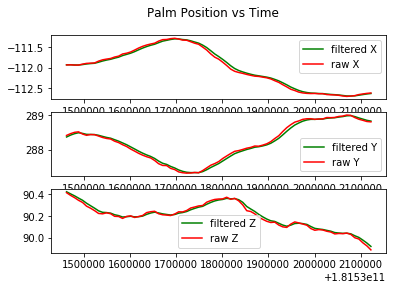

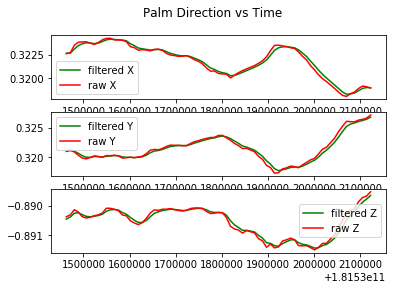

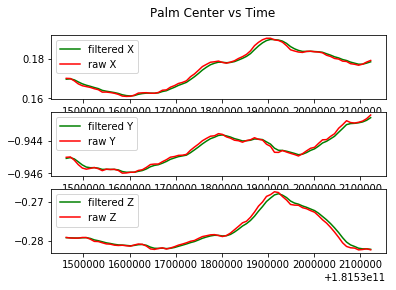

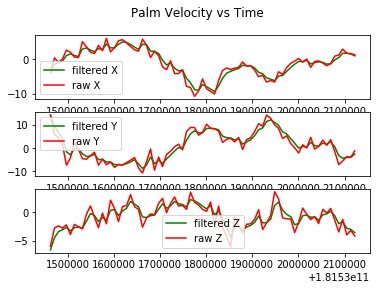

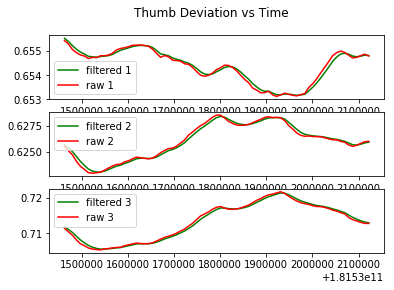

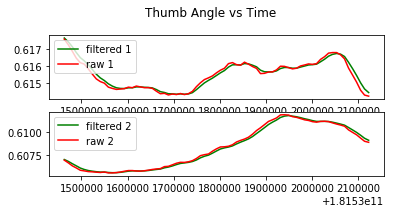

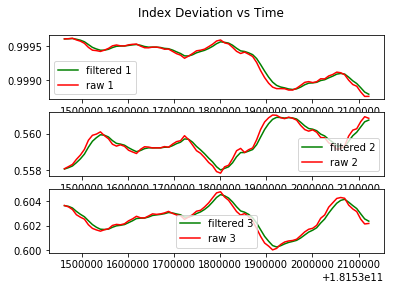

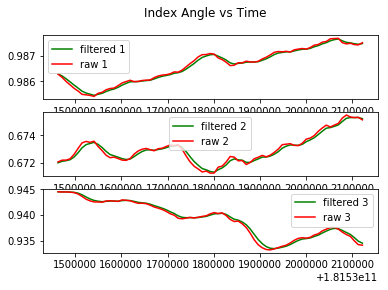

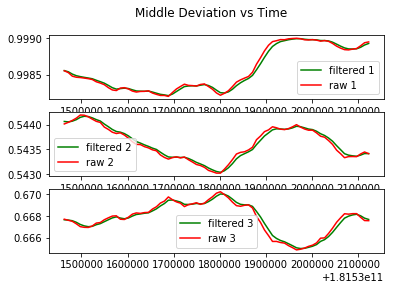

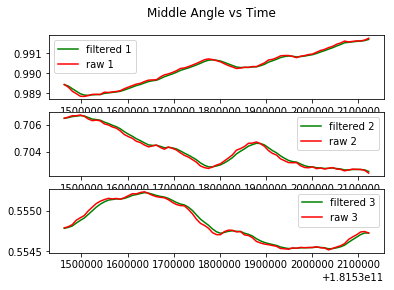

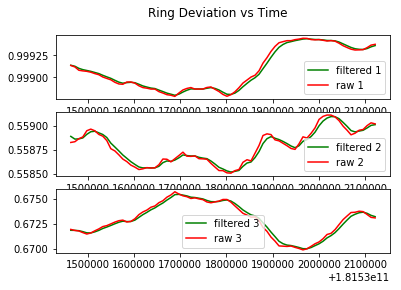

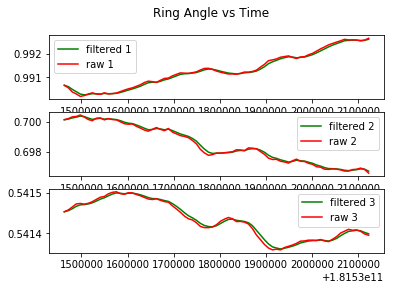

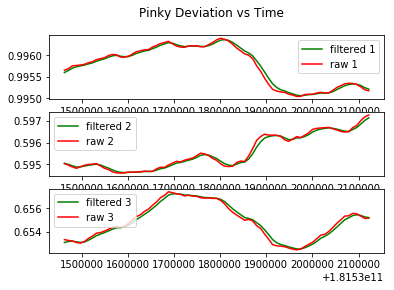

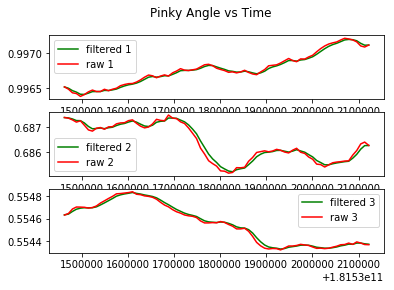

In [10]:
plt.figure(1)
plt.figure(1).suptitle("Palm Position vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,0], 'g', label="filtered X")
plt.plot(rawData[:,41], rawData[:,0], 'r', label="raw X")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,1], 'g', label="filtered Y")
plt.plot(rawData[:,41], rawData[:,1], 'r', label="raw Y")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,2], 'g', label="filtered Z")
plt.plot(rawData[:,41], rawData[:,2], 'r', label="raw Z")
plt.legend(loc='best')
plt.figure(1).show()

plt.figure(2)
plt.figure(2).suptitle("Palm Direction vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,3], 'g', label="filtered X")
plt.plot(rawData[:,41], rawData[:,3], 'r', label="raw X")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,4], 'g', label="filtered Y")
plt.plot(rawData[:,41], rawData[:,4], 'r', label="raw Y")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,5], 'g', label="filtered Z")
plt.plot(rawData[:,41], rawData[:,5], 'r', label="raw Z")
plt.legend(loc='best')
plt.figure(2).show()

plt.figure(3)
plt.figure(3).suptitle("Palm Center vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,6], 'g', label="filtered X")
plt.plot(rawData[:,41], rawData[:,6], 'r', label="raw X")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,7], 'g', label="filtered Y")
plt.plot(rawData[:,41], rawData[:,7], 'r', label="raw Y")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,8], 'g', label="filtered Z")
plt.plot(rawData[:,41], rawData[:,8], 'r', label="raw Z")
plt.legend(loc='best')
plt.figure(3).show()

plt.figure(4)
plt.figure(4).suptitle("Palm Velocity vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,9], 'g', label="filtered X")
plt.plot(rawData[:,41], rawData[:,9], 'r', label="raw X")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,10], 'g', label="filtered Y")
plt.plot(rawData[:,41], rawData[:,10], 'r', label="raw Y")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,11], 'g', label="filtered Z")
plt.plot(rawData[:,41], rawData[:,11], 'r', label="raw Z")
plt.legend(loc='best')
plt.figure(4).show()

plt.figure(5)
plt.figure(5).suptitle("Thumb Deviation vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,12], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,12], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,13], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,13], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,14], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,14], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(5).show()

plt.figure(6)
plt.figure(6).suptitle("Thumb Angle vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,15], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,15], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,16], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,16], 'r', label="raw 2")
plt.legend(loc='best')
plt.figure(6).show()

plt.figure(7)
plt.figure(7).suptitle("Index Deviation vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,17], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,17], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,18], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,18], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,19], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,19], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(7).show()

plt.figure(8)
plt.figure(8).suptitle("Index Angle vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,20], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,20], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,21], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,21], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,22], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,22], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(8).show()

plt.figure(9)
plt.figure(9).suptitle("Middle Deviation vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,23], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,23], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,24], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,24], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,25], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,25], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(9).show()

plt.figure(10)
plt.figure(10).suptitle("Middle Angle vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,26], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,26], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,27], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,27], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,28], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,28], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(10).show()

plt.figure(11)
plt.figure(11).suptitle("Ring Deviation vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,29], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,29], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,30], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,30], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,31], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,31], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(11).show()

plt.figure(12)
plt.figure(12).suptitle("Ring Angle vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,32], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,32], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,33], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,33], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,34], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,34], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(12).show()

plt.figure(13)
plt.figure(13).suptitle("Pinky Deviation vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,35], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,35], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,36], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,36], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,37], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,37], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(13).show()

plt.figure(14)
plt.figure(14).suptitle("Pinky Angle vs Time")
plt.subplot(311)
plt.plot(filteredData[:,41], filteredData[:,38], 'g', label="filtered 1")
plt.plot(rawData[:,41], rawData[:,38], 'r', label="raw 1")
plt.legend(loc='best')
plt.subplot(312)
plt.plot(filteredData[:,41], filteredData[:,39], 'g', label="filtered 2")
plt.plot(rawData[:,41], rawData[:,39], 'r', label="raw 2")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(filteredData[:,41], filteredData[:,40], 'g', label="filtered 3")
plt.plot(rawData[:,41], rawData[:,40], 'r', label="raw 3")
plt.legend(loc='best')
plt.figure(14).show()